
# **Machine Learning I Classification Project**

# Notebook Structure

## 1. Data Preparation and Exploratory Data Analysis (EDA)
- Prepare and clean the dataset.
- Perform exploratory data analysis to identify patterns, trends, and potential outliers.

## 2. Building Models
- Develop predictive models using machine learning algorithms.
- Train and evaluate the models to ensure optimal performance.

## 3. Comparing Results
- Compare the performance metrics of the models.
- Analyze the results to draw meaningful conclusions.



## 1. Data Preparation and Exploratory Data Analysis (EDA)

In [19]:
# Importing the libraries

# Data manipulation and visualization
import pandas as pd  # Used for data manipulation
import seaborn as sns  # Used for data visualization
import matplotlib.pyplot as plt  # Used for data visualization
from matplotlib import rcParams # Used for setting the font globally

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Used for data preprocessing

# Model training and selection
from sklearn.model_selection import train_test_split, GridSearchCV  # Used for data splitting and hyperparameter tuning

# Machine learning models
from sklearn.linear_model import LogisticRegression  # Used for classification as base model
from sklearn.svm import SVC  # Used for classification
from sklearn.ensemble import RandomForestClassifier  # Used for classification

# Model evaluation
from sklearn.metrics import ( roc_auc_score, f1_score, balanced_accuracy_score)  # Used for model evaluation


In [4]:
# Importing the dataset
data = pd.read_csv("/Users/elgun/Desktop/Machine_Learning_Project/data/classification.csv")
data

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87495,120884,4535984,II,>10yrs,Not Vfied,75680.00,RENT,0,0,Engineer Support II,...,whole,MI,12,32702.0,3 years,10012.05,debt consolidation,I,0.0,0
87496,33259,2624710,IV,3yrs,Source Verified,90423.52,RENT,0,0,Dental Hygienist,...,whole,MA,23,32204.0,5 years,24921.54,debt consolidation,I,0.0,0
87497,102153,5966919,II,>10yrs,Source Verified,91520.00,MORTGAGE,0,0,Interface Coordinator,...,fully paid,CT,8,29050.0,3 years,14517.90,debt consolidation,I,0.0,0
87498,115343,2630667,III,1yrs,Source Verified,61600.00,MORTGAGE,0,0,PARTS CLERK,...,whole,PA,11,24900.0,3 years,8454.24,debt consolidation,I,0.0,0


Missing values in each column:
 ID                     0
Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly_Income          0
Home_Status            0
Unpaid_2_years         0
Already_Defaulted      0
Designation            0
Debt_to_Income         0
Postal_Code            0
Lend_Amount            0
Deprecatory_Records    0
Interest_Charged       0
Usage_Rate             0
Inquiries              0
Present_Balance        0
Gross_Collection       0
Sub_GGGrade            0
File_Status            0
State                  0
Account_Open           0
Total_Unpaid_CL        0
Duration               0
Unpaid_Amount          0
Reason                 0
Claim_Type             0
Due_Fee                0
Default                0
dtype: int64


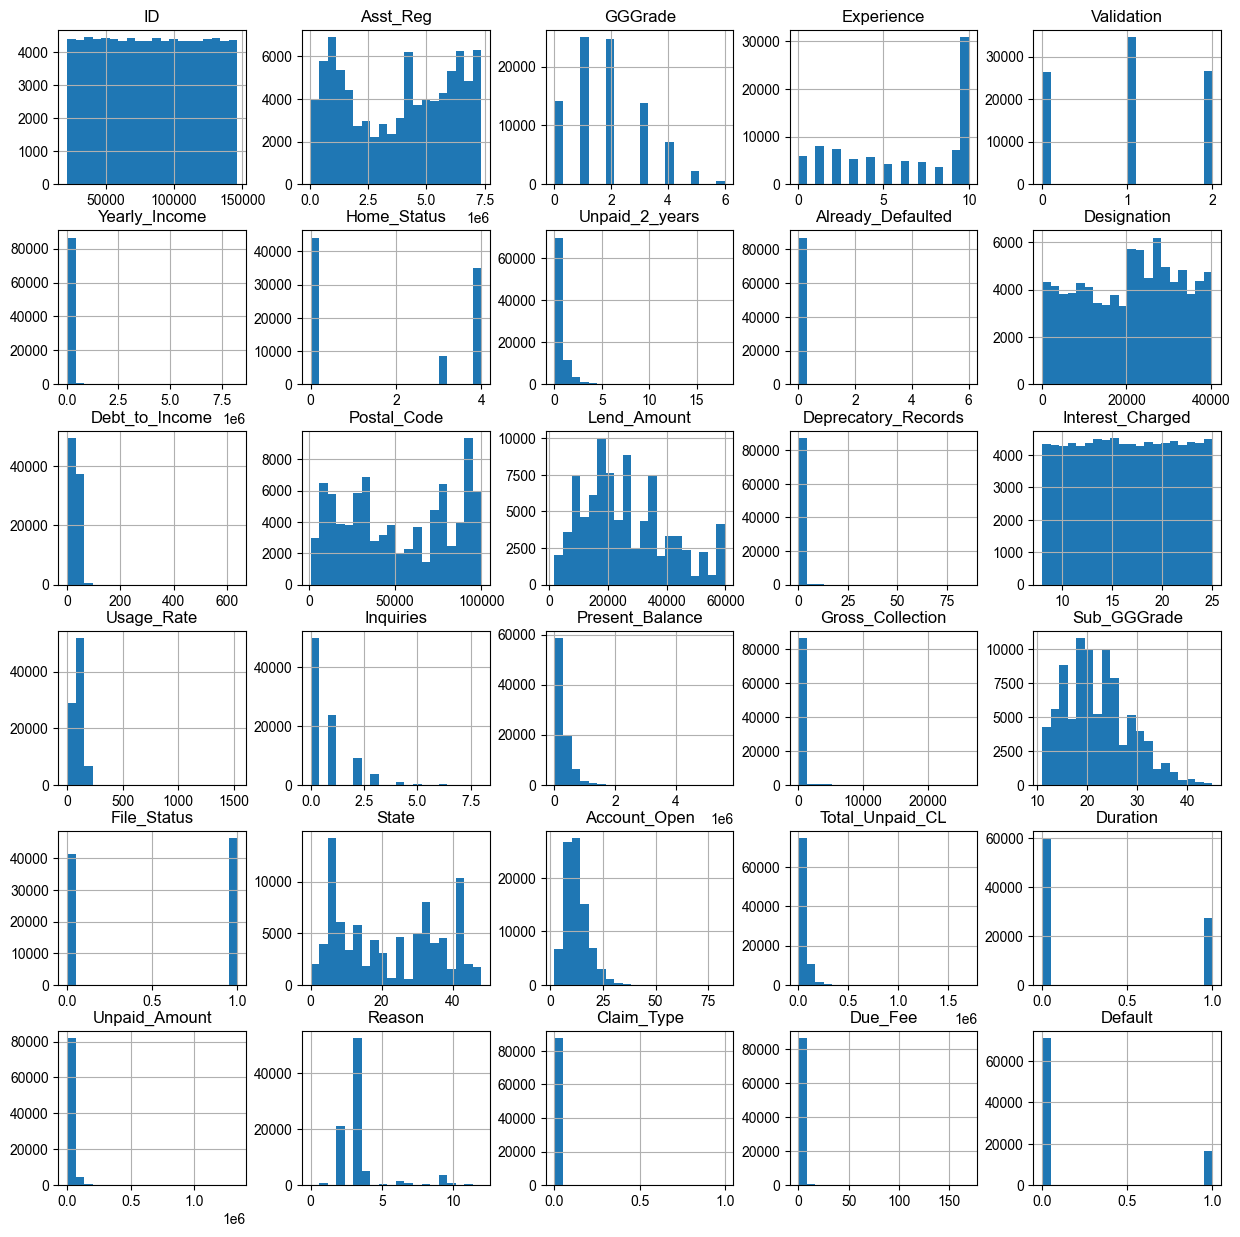

Training and testing set shapes:
X_train: (70000, 28), X_test: (17500, 28), y_train: (70000,), y_test: (17500,)


In [8]:
# Step 1: Check and handle missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values for numerical and categorical columns
data.fillna({
    'Yearly_Income': data['Yearly_Income'].mean(),
    'Debt_to_Income': data['Debt_to_Income'].mean(),
    'Postal_Code': data['Postal_Code'].mode()[0],
    'Designation': 'Unknown',
    'Total_Unpaid_CL': data['Total_Unpaid_CL'].mean(),
    'Unpaid_Amount': data['Unpaid_Amount'].mean()
}, inplace=True)

# Step 2: Analyze distributions of numerical and categorical features
# Numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features].hist(figsize=(15, 15), bins=20)
plt.show()

# Categorical features
# Set the font globally
rcParams['font.family'] = 'Arial'  # Arial is a commonly available font
categorical_features = data.select_dtypes(include=['object']).columns
for column in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=data)
    plt.show()

# Step 3: Encode categorical variables using LabelEncoder
categorical_columns = [
    'GGGrade', 'Experience', 'Validation', 'Home_Status', 'Designation', 'File_Status',
    'State', 'Duration', 'Reason', 'Claim_Type'
]

label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Step 4: Separate features (X) and target (y)
X = data.drop(columns=['ID', 'Default'])  # 'ID' is dropped as it is not a feature
y = data['Default']

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Feature scaling for SVM (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm the shapes of the split datasets
print("Training and testing set shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


## 2. Building Models

# Logistic Regression as the Base Model

In [14]:
# Train Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_scaled, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test_scaled)

# SVM Model for Classification

In [11]:
# Define a parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear'],
    'gamma': ['scale'],
    'class_weight': ['balanced']
}

# GridSearchCV for SVM with parameter grid
svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=2, scoring='accuracy', verbose=1)
svm_grid_search.fit(X_train_scaled, y_train)
svm_grid_search_predictions = svm_grid_search.predict(X_test_scaled)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


# Random Forest for Classification

In [26]:
# Define a parameter grid for Random Forest 
rf_param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [10, 20],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2] 
}

# GridSearchCV for Random Forest with parameter grid
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=2, scoring='accuracy', verbose=1)
rf_grid_search.fit(X_train, y_train)
rf_grid_search_predictions = rf_grid_search.predict(X_test)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


## 3. Comparing Results

# Model Evaluation Metrics

In this project, we evaluate the performance of three classification models: Logistic Regression, SVM, and Random Forest. The models are evaluated using the following metrics, which are well-suited for imbalanced datasets.

## 1. F1-Score

The **F1-Score** is the harmonic mean of **Precision** and **Recall**. It is especially useful for imbalanced datasets because it balances the trade-off between precision (accuracy of positive predictions) and recall (ability to find all positives).

### Formula:

$
F1\text{-Score} = \frac{2 \times (Precision \times Recall)}{Precision + Recall}
$

Where:

- **Precision** is the proportion of true positives among all positive predictions:
$
  Precision = \frac{TP}{TP + FP}
$

- **Recall** is the proportion of true positives among all actual positives:
$
  Recall = \frac{TP}{TP + FN}
$

A higher F1-Score indicates better performance, as it considers both false positives and false negatives.

## 2. Precision-Recall AUC (Area Under the Curve)

The **Precision-Recall AUC** provides a single scalar value to summarize the performance of the classifier. It plots Precision versus Recall at different thresholds, and the AUC represents the area under this curve.

### Interpretation:
- A higher **Precision-Recall AUC** indicates better performance, especially when the dataset is imbalanced.
- A value closer to 1 is ideal, as it indicates the model's ability to correctly identify positive cases.

## 3. Balanced Accuracy

The **Balanced Accuracy** metric accounts for imbalanced datasets by considering the accuracy for both classes. It is the average of recall calculated separately for the positive and negative classes.

### Formula:

$
Balanced\ Accuracy = \frac{Recall\ for\ Positive\ Class + Recall\ for\ Negative\ Class}{2}
$

Where:

- **Recall for the Positive Class**:
$
  Recall\_Positive = \frac{TP}{TP + FN}
$

- **Recall for the Negative Class**:
$
  Recall\_Negative = \frac{TN}{TN + FP}
$

### Interpretation:
- A **Balanced Accuracy** close to 1 indicates that the model performs equally well for both classes, addressing the imbalance issue.
- It is particularly helpful when the majority class dominates the dataset, making traditional accuracy unreliable.

## Model Comparison

The models will be compared based on the following:

- **Highest F1-Score**: Indicates the best balance between precision and recall for both classes.
- **Highest Precision-Recall AUC**: Highlights the model's performance on the minority class.
- **Highest Balanced Accuracy**: Ensures that the model performs consistently across both classes, avoiding bias toward the majority class.

## Conclusion

We will select the model that achieves the highest F1-Score, Precision-Recall AUC, and Balanced Accuracy. This comprehensive evaluation ensures a robust choice for addressing the challenges posed by the imbalanced dataset.


In [27]:
# Evaluate the models

# Logistic Regression
F1_score_logistic_regression = f1_score(y_test, logistic_regression_predictions)
Precision_recall_auc_logistic_regression = roc_auc_score(y_test, logistic_regression_predictions)
balanced_accuracy_score_logistic_regression = balanced_accuracy_score(y_test, logistic_regression_predictions)

# SVM
F1_score_svm = f1_score(y_test, svm_grid_search_predictions)
Precision_recall_auc_svm = roc_auc_score(y_test, svm_grid_search_predictions)
balanced_accuracy_score_svm = balanced_accuracy_score(y_test, svm_grid_search_predictions)

# Random Forest
F1_score_rf = f1_score(y_test, rf_grid_search_predictions)
Precision_recall_auc_rf = roc_auc_score(y_test, rf_grid_search_predictions)
balanced_accuracy_score_rf = balanced_accuracy_score(y_test, rf_grid_search_predictions)

In [28]:
# Create a DataFrame to display the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'F1 Score': [F1_score_logistic_regression, F1_score_svm, F1_score_rf],
    'Precision-Recall AUC': [
        Precision_recall_auc_logistic_regression, 
        Precision_recall_auc_svm, 
        Precision_recall_auc_rf
    ],
    'Balanced Accuracy': [
        balanced_accuracy_score_logistic_regression,
        balanced_accuracy_score_svm,
        balanced_accuracy_score_rf
    ]
})

# Print the DataFrame
print(metrics_df)

# Identify the best model based on F1 Score and Precision-Recall AUC
# Compute a ranking score based on F1-Score, Precision-Recall AUC, and Balanced Accuracy
metrics_df['Ranking Score'] = (
    metrics_df['F1 Score'] + metrics_df['Precision-Recall AUC'] + metrics_df['Balanced Accuracy']
)

# Find the best model based on the ranking score
best_model_index = metrics_df['Ranking Score'].idxmax()
best_model = metrics_df.iloc[best_model_index]

# Print the best model details
print("\nBest Model based on F1 Score, Precision-Recall AUC, and Balanced Accuracy:")
print(f"Model: {best_model['Model']}")
print(f"F1 Score: {best_model['F1 Score']}")
print(f"Precision-Recall AUC: {best_model['Precision-Recall AUC']}")
print(f"Balanced Accuracy: {best_model['Balanced Accuracy']}")


                 Model  F1 Score  Precision-Recall AUC  Balanced Accuracy
0  Logistic Regression  0.401636              0.627357           0.627357
1                  SVM  0.524882              0.753762           0.753762
2        Random Forest  0.355596              0.607369           0.607369

Best Model based on F1 Score, Precision-Recall AUC, and Balanced Accuracy:
Model: SVM
F1 Score: 0.5248823470511665
Precision-Recall AUC: 0.7537619292571469
Balanced Accuracy: 0.753761929257147


# Conclusion: Model Comparison

## Model Performance Comparison

The following table summarizes the performance of three models: **Logistic Regression**, **SVM**, and **Random Forest**, based on **F1 Score**, **Precision-Recall AUC**, and **Balanced Accuracy**:

| Model             | F1 Score    | Precision-Recall AUC | Balanced Accuracy |
|-------------------|-------------|----------------------|-------------------|
| **Logistic Regression** | 0.401636    | 0.627357             | 0.627357          |
| **SVM**              | 0.524882    | 0.753762             | 0.753762          |
| **Random Forest**    | 0.355596    | 0.607369             | 0.607369          |

### Best Model Based on Performance Metrics:
After comparing the models, the **SVM** (Support Vector Machine) model emerges as the best performer across all key metrics:

- **F1 Score**: **0.5249**
- **Precision-Recall AUC**: **0.7538**
- **Balanced Accuracy**: **0.7538**

### Key Insights:
1. **SVM Performance:**
   - The **SVM** model achieved the highest **F1 Score** (0.5249), indicating a better balance between precision and recall.
   - It also excelled in **Precision-Recall AUC** and **Balanced Accuracy**, both of which were the highest among the models, showcasing its ability to correctly classify both positive and negative cases with a high degree of accuracy.

2. **Logistic Regression and Random Forest:**
   - Both **Logistic Regression** and **Random Forest** performed weaker compared to SVM, with lower F1 Scores, Precision-Recall AUC, and Balanced Accuracy.

3. **Model Runtime:**
   - The **Random Forest** model, despite having lower performance metrics, required a significantly longer runtime compared to **Logistic Regression**. This highlights the trade-off between model complexity and computation time. **Logistic Regression** is much faster to train and predict, making it a better option in scenarios where computational efficiency is important.

### Conclusion:
The **SVM** model is the best choice for this classification task based on its superior performance across all evaluation metrics. However, **Logistic Regression** may be more practical in situations where faster computation is crucial. Additionally, the **Random Forest** model, while performing well in certain scenarios, has a higher computational cost due to its complexity.
